In [ ]:
apikey = 'YOURAPIKEY'
secret = 'YOURAPISECRET'

In [ ]:
!pip install python-binance pandas mplfinance

     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 71kB 4.4MB/s 
     |████████████████████████████████| 286kB 8.7MB/s 
     |████████████████████████████████| 184kB 9.4MB/s 
     |████████████████████████████████| 1.3MB 10.5MB/s 
     |████████████████████████████████| 112kB 28.7MB/s 
     |████████████████████████████████| 296kB 20.5MB/s 
     |████████████████████████████████| 143kB 31.5MB/s 


In [ ]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [ ]:
client = Client(apikey, secret)

In [ ]:
tickers = client.get_all_tickers()
tickers

[{'price': '0.06903900', 'symbol': 'ETHBTC'},
 {'price': '0.00458700', 'symbol': 'LTCBTC'},
 {'price': '0.00989200', 'symbol': 'BNBBTC'},
 {'price': '0.00141800', 'symbol': 'NEOBTC'},
 {'price': '0.00398100', 'symbol': 'QTUMETH'},
 {'price': '0.00205200', 'symbol': 'EOSETH'},
 {'price': '0.00003302', 'symbol': 'SNTETH'},
 {'price': '0.00164400', 'symbol': 'BNTETH'},
 {'price': '0.07908100', 'symbol': 'BCCBTC'},
 {'price': '0.00022760', 'symbol': 'GASBTC'},
 {'price': '0.14322000', 'symbol': 'BNBETH'},
 {'price': '36695.71000000', 'symbol': 'BTCUSDT'},
 {'price': '2533.76000000', 'symbol': 'ETHUSDT'},
 {'price': '0.00041400', 'symbol': 'HSRBTC'},
 {'price': '0.00017780', 'symbol': 'OAXETH'},
 {'price': '0.00002801', 'symbol': 'DNTETH'},
 {'price': '0.00577200', 'symbol': 'MCOETH'},
 {'price': '0.00166300', 'symbol': 'ICNETH'},
 {'price': '0.00021140', 'symbol': 'MCOBTC'},
 {'price': '0.00002222', 'symbol': 'WTCBTC'},
 {'price': '0.00023700', 'symbol': 'WTCETH'},
 {'price': '0.00000915',

In [ ]:
tickers[1]['price']

'0.00458700'

In [ ]:
ticker_df = pd.DataFrame(tickers)
ticker_df.head()

symbol       price
0   ETHBTC  0.06903900
1   LTCBTC  0.00458700
2   BNBBTC  0.00989200
3   NEOBTC  0.00141800
4  QTUMETH  0.00398100

In [ ]:
ticker_df = pd.DataFrame(tickers)
ticker_df.tail()

symbol       price
1483  XEMBUSD  0.17310000
1484   ATABTC  0.00002381
1485   ATABNB  0.00241170
1486  ATABUSD  0.87502000
1487  ATAUSDT  0.87500000

In [ ]:
ticker_df.set_index('symbol', inplace=True)

In [ ]:
float(ticker_df.loc['ETHBTC']['price'])

0.069039

In [ ]:

depth = client.get_order_book(symbol='BTCUSDT')
depth

{'asks': [['36679.82000000', '0.01090900'],
  ['36679.84000000', '0.02181300'],
  ['36679.85000000', '0.00307800'],
  ['36679.99000000', '0.89599300'],
  ['36680.00000000', '1.70665000'],
  ['36681.24000000', '0.01645900'],
  ['36686.82000000', '0.40000000'],
  ['36687.67000000', '0.44730200'],
  ['36687.97000000', '0.02000000'],
  ['36688.08000000', '0.45200000'],
  ['36689.81000000', '0.29716600'],
  ['36689.82000000', '0.02000000'],
  ['36690.11000000', '0.00071600'],
  ['36691.89000000', '0.29716600'],
  ['36691.90000000', '0.46707300'],
  ['36691.92000000', '0.18336300'],
  ['36691.95000000', '0.23944600'],
  ['36692.02000000', '0.20432100'],
  ['36692.80000000', '0.16000000'],
  ['36695.17000000', '0.00400000'],
  ['36695.57000000', '0.29165700'],
  ['36695.73000000', '0.00222900'],
  ['36696.27000000', '0.00200000'],
  ['36696.57000000', '0.27244900'],
  ['36697.08000000', '1.48890100'],
  ['36697.11000000', '0.00197800'],
  ['36697.73000000', '2.63250000'],
  ['36697.93000000',

In [ ]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

Price      Volume
0  36679.82000000  0.01090900
1  36679.84000000  0.02181300
2  36679.85000000  0.00307800
3  36679.99000000  0.89599300
4  36680.00000000  1.70665000

In [ ]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

In [ ]:
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')
historical

[[1499990400000,
  '0.08000000',
  '0.09103300',
  '0.08000000',
  '0.09099300',
  '1942.05700000',
  1500076799999,
  '170.23852396',
  1994,
  '1076.40500000',
  '94.82527222',
  '22262.26697743'],
 [1500076800000,
  '0.09099300',
  '0.09369900',
  '0.08712700',
  '0.08763500',
  '4013.06600000',
  1500163199999,
  '363.03178785',
  4623,
  '2250.31800000',
  '203.54149755',
  '22275.36801826'],
 [1500163200000,
  '0.08750800',
  '0.08763500',
  '0.07559100',
  '0.08224100',
  '8904.15800000',
  1500249599999,
  '722.21248196',
  8137,
  '5557.57500000',
  '450.34388688',
  '22295.47295841'],
 [1500249600000,
  '0.08236800',
  '0.08839400',
  '0.08169900',
  '0.08753700',
  '6650.93300000',
  1500335999999,
  '568.24653804',
  7639,
  '3859.48500000',
  '329.66875309',
  '22165.74281157'],
 [1500336000000,
  '0.08783100',
  '0.10906800',
  '0.08477700',
  '0.10773200',
  '7245.74100000',
  1500422399999,
  '674.49785037',
  8121,
  '4202.05500000',
  '393.11140275',
  '22505.62469176

In [ ]:
hist_df = pd.DataFrame(historical)
hist_df.head()

0           1   ...            10              11
0  1499990400000  0.08000000  ...   94.82527222  22262.26697743
1  1500076800000  0.09099300  ...  203.54149755  22275.36801826
2  1500163200000  0.08750800  ...  450.34388688  22295.47295841
3  1500249600000  0.08236800  ...  329.66875309  22165.74281157
4  1500336000000  0.08783100  ...  393.11140275  22505.62469176

[5 rows x 12 columns]

In [ ]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [ ]:
hist_df.tail()

Open Time        Open  ... TB Quote Volume Ignore
1423  1622937600000  0.07398900  ...   4346.74874190      0
1424  1623024000000  0.07575200  ...   5833.46794455      0
1425  1623110400000  0.07724900  ...   6313.46876626      0
1426  1623196800000  0.07512300  ...   9156.84445114      0
1427  1623283200000  0.06981200  ...   1444.17085313      0

[5 rows x 12 columns]

In [ ]:

hist_df.shape

(1428, 12)

In [ ]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [ ]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [ ]:

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [ ]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)
hist_df.tail()

Open Time      Open      High  ...  TB Base Volume  TB Quote Volume  Ignore
1423 2021-06-06  0.073989  0.075961  ...       58055.198      4346.748742       0
1424 2021-06-07  0.075752  0.077594  ...       76102.471      5833.467945       0
1425 2021-06-08  0.077249  0.077572  ...       83334.560      6313.468766       0
1426 2021-06-09  0.075123  0.075308  ...      127174.484      9156.844451       0
1427 2021-06-10  0.069812  0.069921  ...       20803.940      1444.170853       0

[5 rows x 12 columns]

In [ ]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [ ]:
  hist_df.describe()

Open         High  ...  TB Base Volume  TB Quote Volume
count  1428.000000  1428.000000  ...     1428.000000      1428.000000
mean      0.041079     0.042189  ...   108051.586191      4006.139095
std       0.021342     0.022117  ...    73167.059150      3068.593286
min       0.016415     0.016560  ...     1076.405000        94.825272
25%       0.025692     0.026144  ...    61290.094250      1937.225899
50%       0.032837     0.033535  ...    91858.298000      3378.774599
75%       0.054514     0.056165  ...   139752.645000      5063.320764
max       0.113075     0.123799  ...   701279.783000     28345.303271

[8 rows x 9 columns]

In [ ]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1428 non-null   datetime64[ns]
 1   Open                1428 non-null   float64       
 2   High                1428 non-null   float64       
 3   Low                 1428 non-null   float64       
 4   Close               1428 non-null   float64       
 5   Volume              1428 non-null   float64       
 6   Close Time          1428 non-null   datetime64[ns]
 7   Quote Asset Volume  1428 non-null   float64       
 8   Number of Trades    1428 non-null   int64         
 9   TB Base Volume      1428 non-null   float64       
 10  TB Quote Volume     1428 non-null   float64       
 11  Ignore              1428 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 134.0+ KB


In [ ]:
  
import mplfinance as mpf

In [ ]:
hist_df.set_index('Close Time').tail(100)

Open Time      Open  ...  TB Quote Volume  Ignore
Close Time                                          ...                         
2021-03-03 23:59:59.999000072 2021-03-03  0.030699  ...      5068.275674       0
2021-03-04 23:59:59.999000072 2021-03-04  0.031135  ...      4929.250453       0
2021-03-05 23:59:59.999000072 2021-03-05  0.031820  ...      4791.504870       0
2021-03-06 23:59:59.999000072 2021-03-06  0.031346  ...      5948.434315       0
2021-03-07 23:59:59.999000072 2021-03-07  0.033761  ...      5413.834121       0
...                                  ...       ...  ...              ...     ...
2021-06-06 23:59:59.999000072 2021-06-06  0.073989  ...      4346.748742       0
2021-06-07 23:59:59.999000072 2021-06-07  0.075752  ...      5833.467945       0
2021-06-08 23:59:59.999000072 2021-06-08  0.077249  ...      6313.468766       0
2021-06-09 23:59:59.999000072 2021-06-09  0.075123  ...      9156.844451       0
2021-06-10 23:59:59.999000072 2021-06-10  0.069812  ...      1444.170853       0

[100 rows x 11 columns]

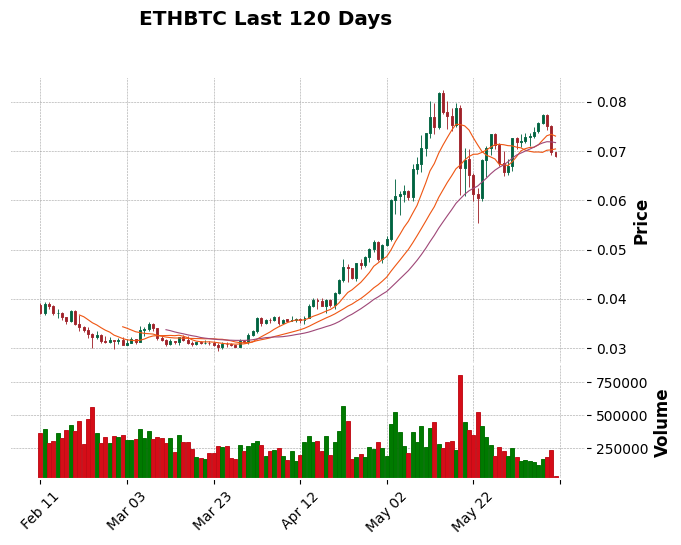

In [ ]:
mpf.plot(hist_df.set_index('Close Time').tail(120), 
        type='candle', style='charles', 
        volume=True, 
        title='ETHBTC Last 120 Days', 
        mav=(10,20,30))